# IPL Data analysis:
[Dataset Google Drive link](https://drive.google.com/file/d/1ZkleSo1uaNiSjqpqSyAHJWdl9HAYNJEy/view?usp=sharing)
<br>I took inspiration and the dataset from the [this youtube video](https://www.youtube.com/watch?v=pbS5z-j4dd0&t=282s&ab_channel=Simplilearn).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib widget

In [2]:
match_data = pd.read_csv('IPL Dataset and Code\IPL Matches 2008-2020.csv')
ball_data = pd.read_csv("IPL Dataset and Code\IPL Ball-by-Ball 2008-2020.csv")

### Let's see the actual size of the data frame:

In [3]:
match_data.shape

(816, 17)

In [4]:
ball_data.shape

(193468, 18)

In [5]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [6]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


### Checking for null values

In [7]:
match_data.isnull()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
812,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
813,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
814,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


### Finding the total number of null values in all columns:

In [8]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

### Let us see all the columns present in our data frames:

In [9]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [10]:
ball_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

### How many matches have been played so far as per the available data (2008-2020)?
### List all the cities where matches have been played. 
### List all the teams that have participated so far.

In [11]:
print('Match played so far = ', match_data.shape[0])
print('\nCities played at: ', match_data['city'].unique())
print('\nTeams participated', match_data['team1'].unique())

Match played so far =  816

Cities played at:  ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

Teams participated ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


## Total no of matches played between 2008 and 2020?

In [12]:
print(f'The total no. of matches recorded in the data frame is {match_data.shape[0]}.')

The total no. of matches recorded in the data frame is 816.


### Matches which have no winner and the match was suspended:

In [13]:
match_data.loc[match_data['winner'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,21-05-2011,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,29-04-2015,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,17-05-2015,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,30-04-2019,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


### Total no of matches played between 2008 and 2020 which have a clear winner

In [14]:
clearwinner = match_data.loc[match_data['winner'].notnull()]

print(f'Total no of matches played between 2008 and 2020 which have a clear winner = {clearwinner.shape[0]}')

Total no of matches played between 2008 and 2020 which have a clear winner = 812


## How many matches were played in each season?
To solve this, we need to group the matches by season.
<br>
Let us create a new column which contains the season in which the particular match was played. 
<br> Then, we group all the matches by season (season_group).

    Season  total_matches
0     2008             58
1     2009             57
2     2010             60
3     2011             73
4     2012             74
5     2013             76
6     2014             60
7     2015             59
8     2016             60
9     2017             59
10    2018             60
11    2019             60
12    2020             60


Text(0.5, 0.98, 'No. of matches played in different seasons')

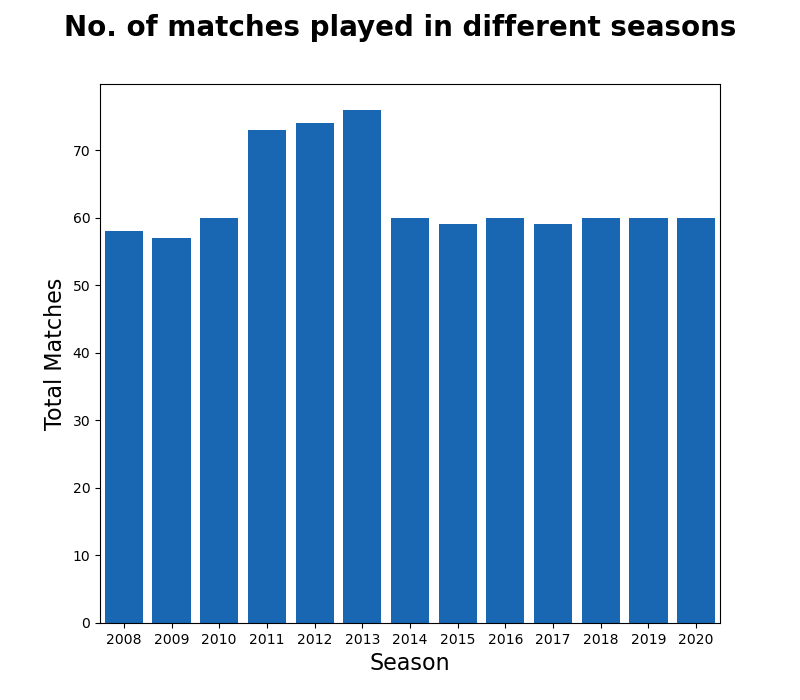

In [15]:
match_data['season'] = pd.DatetimeIndex(match_data['date']).year
season_group = match_data.groupby(['season'])['id'].count().reset_index().rename(columns = {'season' : 'Season', 'id' : 'total_matches'})
print(season_group)
fig1, ax1 = plt.subplots(figsize = (8,7))
sns.barplot(x = 'Season', y = 'total_matches',data = season_group, color = (0,0.4,0.8), ax = ax1)
ax1.set_xlabel('Season', fontsize = 16)
ax1.set_ylabel('Total Matches', fontsize = 16)
fig1.suptitle('No. of matches played in different seasons', fontweight = 'bold', fontsize = 20)


## How many runs were scored in each season?
We perform a left join to join the two dataframes ball_data and match_data.<br>
Then we group the runs scored by season and then we carry out visualization.

    season  runs_in_season
0     2008           17937
1     2009           16320
2     2010           18864
3     2011           21154
4     2012           22453
5     2013           22541
6     2014           18909
7     2015           18332
8     2016           18862
9     2017           18769
10    2018           19901
11    2019           19400
12    2020           19352


Text(0, 0.5, 'Runs Scored')

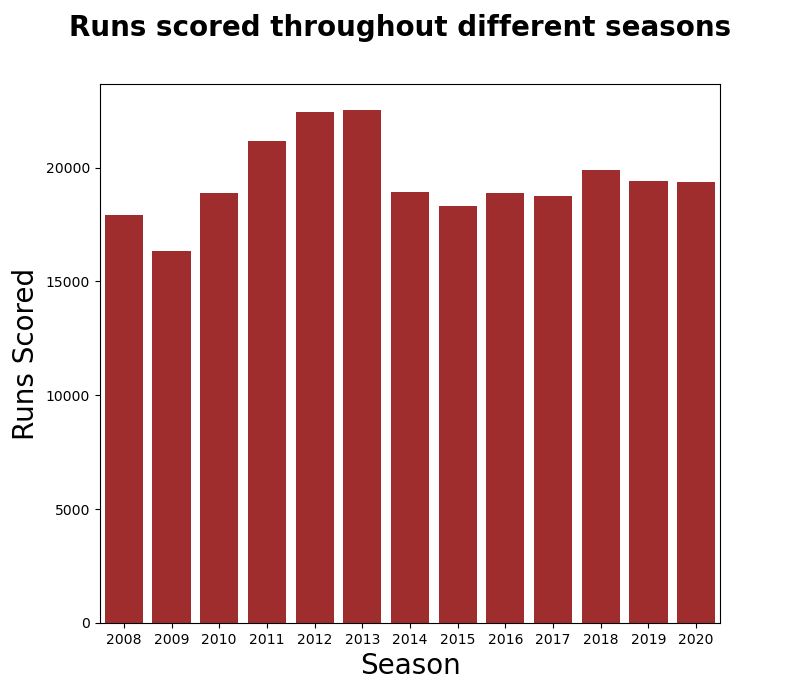

In [16]:
season_data = match_data[['season','id']].merge(ball_data, how = 'left', left_on='id' , right_on= 'id')
season_data.drop('id',axis = 1, inplace=True)
run_by_season = season_data.groupby(['season'])
runs = run_by_season['total_runs'].sum().reset_index().rename(columns = {'total_runs' : 'runs_in_season'})
print(runs)

fig2, ax2 = plt.subplots(figsize = (8,7))

sns.barplot(x = 'season', y = 'runs_in_season',data = runs,  color = (0.7,0.1,0.1), ax = ax2)

ax2.set_xlabel('Season', fontsize = 16)
ax2.set_ylabel('Runs scored in season', fontsize = 16)
fig2.suptitle('Runs scored throughout different seasons', fontweight = 'bold', fontsize = 20)

ax2.set_xlabel('Season', fontsize = 20)
ax2.set_ylabel('Runs Scored', fontsize = 20)

## How many runs were scored per match in each season (on an average)?
We already have a 'runs' dataframe which contains the total runs scored in each season. We also have the 'season_group' data frame which contains number of matches played in each season. So we join these 2 tables. <br>
Finally, we calculate the number of runs scored per match in every season.

In [17]:
runs_permatch_perseason = season_group.merge(runs, left_on='Season', right_on = 'season').drop('season',axis = 'columns')

runs_permatch_perseason['Runs per match'] = \
runs_permatch_perseason['runs_in_season'].div(runs_permatch_perseason['total_matches'])

print(runs_permatch_perseason)

    Season  total_matches  runs_in_season  Runs per match
0     2008             58           17937      309.258621
1     2009             57           16320      286.315789
2     2010             60           18864      314.400000
3     2011             73           21154      289.780822
4     2012             74           22453      303.418919
5     2013             76           22541      296.592105
6     2014             60           18909      315.150000
7     2015             59           18332      310.711864
8     2016             60           18862      314.366667
9     2017             59           18769      318.118644
10    2018             60           19901      331.683333
11    2019             60           19400      323.333333
12    2020             60           19352      322.533333


## How many times batting and bowling respectively were chosen in each season?

                           Team  Tosses_won
0                Mumbai Indians         106
1         Kolkata Knight Riders          98
2           Chennai Super Kings          97
3              Rajasthan Royals          87
4   Royal Challengers Bangalore          87
5               Kings XI Punjab          85
6              Delhi Daredevils          80
7           Sunrisers Hyderabad          57
8               Deccan Chargers          43
9                Delhi Capitals          20
10                Pune Warriors          20
11                Gujarat Lions          15
12         Kochi Tuskers Kerala           8
13      Rising Pune Supergiants           7
14       Rising Pune Supergiant           6


<AxesSubplot:xlabel='season', ylabel='count'>

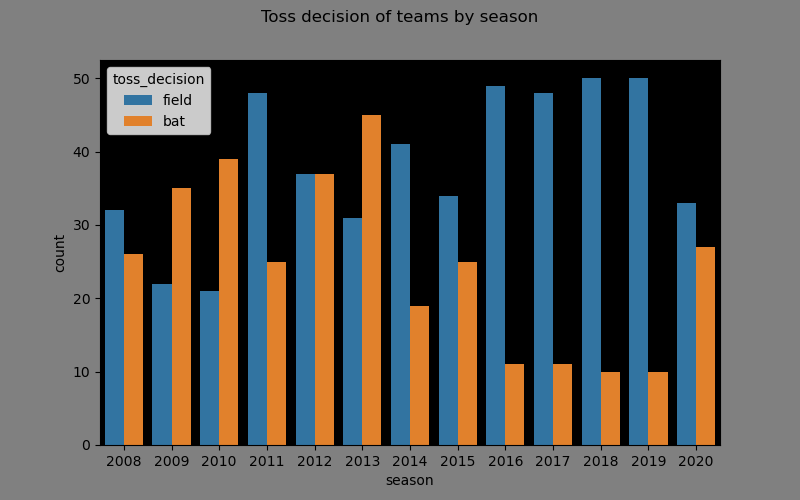

In [18]:
toss_winner = match_data['toss_winner'].value_counts().reset_index().rename(columns = {'index':'Team', 'toss_winner':'Tosses_won'})
print(toss_winner)

fig2,ax2 = plt.subplots(figsize = (8,5))
fig2.set_facecolor('grey')
fig2.suptitle('Toss decision of teams by season')
ax2.set_facecolor('black')
sns.countplot(x = 'season', data = match_data, hue = 'toss_decision')

## Find no. of tosses won by the respective teams.

In [19]:
toss_winner = match_data['toss_winner'].value_counts().reset_index().rename(columns = {'index':'Team', 'toss_winner': 'Tosses_won'})
print(toss_winner)


                           Team  Tosses_won
0                Mumbai Indians         106
1         Kolkata Knight Riders          98
2           Chennai Super Kings          97
3              Rajasthan Royals          87
4   Royal Challengers Bangalore          87
5               Kings XI Punjab          85
6              Delhi Daredevils          80
7           Sunrisers Hyderabad          57
8               Deccan Chargers          43
9                Delhi Capitals          20
10                Pune Warriors          20
11                Gujarat Lions          15
12         Kochi Tuskers Kerala           8
13      Rising Pune Supergiants           7
14       Rising Pune Supergiant           6


Text(0.5, 1.0, 'No. of tosses won by all teams')

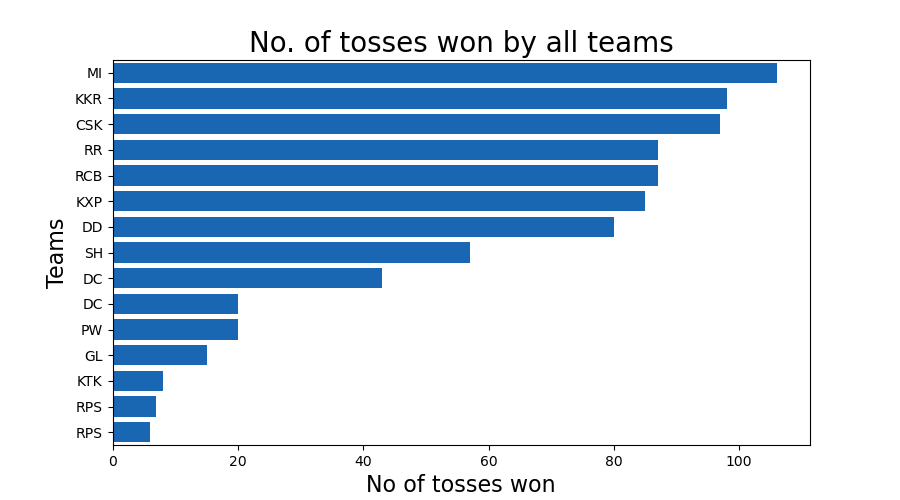

In [20]:
# Making a dictionary of all team names
team_abbrev = {}
for teams in (toss_winner['Team']):
    wordsplitted = teams.split(' ')
    no_of_words = len(wordsplitted)
    result = ''
    for no_ in range(no_of_words):
        result = result + wordsplitted[no_][0]
    team_abbrev[teams] = result  
    
# Plotting the results on a bar chart
fig3, ax3 = plt.subplots(figsize = (9,5))
sns.barplot(y = 'Team', x = 'Tosses_won', data = toss_winner, color = (0,0.4,0.8) , ax = ax3, orient='h')
x_labels = []
for teams in toss_winner['Team']:
    x_labels.append(team_abbrev[teams])
ax3.set_yticklabels(x_labels)
ax3.set_xlabel('No of tosses won', fontsize = 16)
ax3.set_ylabel('Teams', fontsize = 16)
ax3.set_title('No. of tosses won by all teams', fontsize = 20)


## Which out of the team batting first or the chasing team is more likely to win?

In [21]:
match_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

Clearly, stats are suggesting that chasing teams are more likely to win .
## Which stadium has better record for chase?

In [22]:
philter = match_data['result'] == 'wickets'
print(match_data.loc[philter]['venue'].mode())

0    Eden Gardens
dtype: object


## Which stadium has better record for teams batting first?

In [23]:
philter1 = (match_data['result'] == 'runs')
match_data.loc[philter1]['venue'].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

## Which stadium is best if you win the toss?

In [24]:
filterr1 = (match_data['toss_winner'] == match_data['winner'])
match_data.loc[filterr1,['venue']].mode()

,venue
0,Eden Gardens


## Which is the best chasing team ranked from top to bottom?

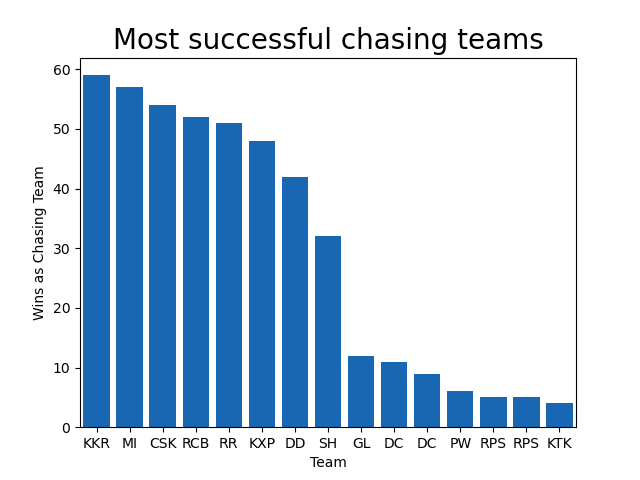

In [25]:
for indexx in match_data.index:
    # team1 fields first when:
    if (match_data.loc[indexx, 'toss_winner'] == match_data.loc[indexx, 'team1'] and match_data.loc[indexx, 'toss_decision'] == 'field') or(match_data.loc[indexx, 'toss_winner'] == match_data.loc[indexx, 'team2'] and match_data.loc[indexx, 'toss_decision'] == 'bat'):
        match_data.loc[indexx, 'bat_first'] = match_data.loc[indexx, 'team2']
        match_data.loc[indexx, 'chasingteam'] = match_data.loc[indexx, 'team1']

    else:
        match_data.loc[indexx, 'bat_first'] = match_data.loc[indexx, 'team1']
        match_data.loc[indexx, 'chasingteam'] = match_data.loc[indexx, 'team2']

top_chasing_teams = match_data.loc[(match_data['chasingteam'] == match_data['winner']),'winner'].value_counts().reset_index()

top_chasing_teams.rename(columns = {'index' : 'Team', 'winner': 'Wins as Chasing Team'}, inplace=True)
#print(top_chasing_teams)

fig4,ax4  =plt.subplots()
sns.barplot(x = 'Team', y = 'Wins as Chasing Team', data = top_chasing_teams,  color = (0,0.4,0.8), ax = ax4)

xtick_label_list = []
for teams in top_chasing_teams['Team']:
    xtick_label_list.append(team_abbrev[teams])

ax4.set_xticklabels(xtick_label_list)
dontprint = ax4.set_title('Most successful chasing teams', fontdict={'size' : '20'})

## Which is the best defending (batting first) team ranked from top to bottom?


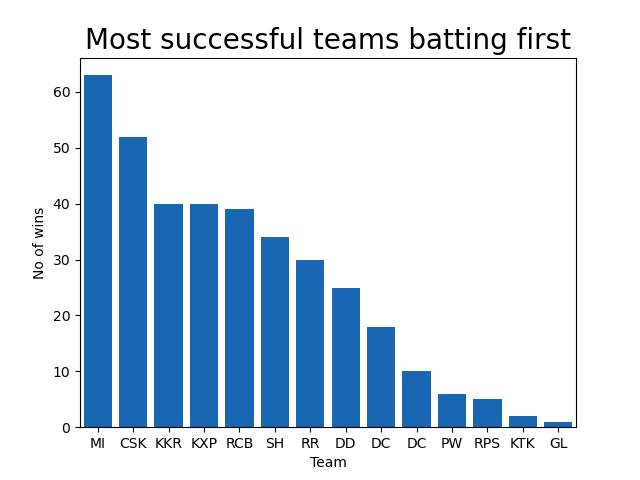

In [26]:
top_btfrsteams = match_data.loc[(match_data['bat_first'] == match_data['winner']),'winner'].value_counts().reset_index()
top_btfrsteams.rename(columns = {'index':'Team', 'winner':'No of wins'}, inplace= True)
fig5,ax5 = plt.subplots()

sns.barplot(x = 'Team', y = 'No of wins', data = top_btfrsteams,  color = (0,0.4,0.8), ax = ax5)

xtick_label_list = []
for teams in top_btfrsteams['Team']:
    xtick_label_list.append(team_abbrev[teams])

ax5.set_xticklabels(xtick_label_list)
dontprint = ax5.set_title('Most successful teams batting first', fontdict={'size' : '20'})

## Does winning the toss imply winning the match?

Out of 816 matches the team which won the toss also won the match 418 times with a probability of 51.225490196078425


From the figure below it is evident that winning the toss may or may not lead a team to a win,
as the probabilities of either outcomes is almost the same


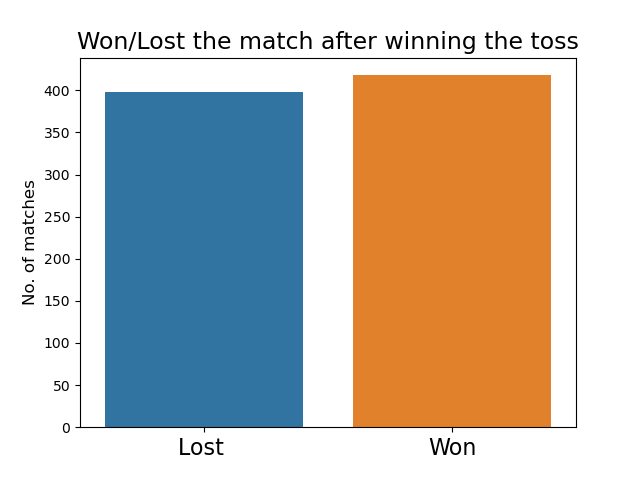

In [27]:
tosses_won = match_data.loc[(match_data['toss_winner'] == match_data['winner'])].shape[0]

print(f'Out of {match_data.shape[0]} matches \
the team which won the toss also won the match {tosses_won} times with a probability of \
{tosses_won/ match_data.shape[0] * 100}' )

tossfilter = match_data['toss_winner'] == match_data['winner']


fg6,ax6 = plt.subplots()
sns.countplot( x = tossfilter)
ax6.set_xticklabels(['Lost ','Won'], fontsize = 16)
ax6.set_ylabel('No. of matches', fontsize = 12)
ax6.set_title('Won/Lost the match after winning the toss', fontsize = 17)


print('\n\nFrom the figure below it is evident that winning the toss may or may not lead a team to a win,\n\
as the probabilities of either outcomes is almost the same')

## Does choosing to bat or ball first leads to winning matches?

Text(0.5, 1.0, 'Won the match based on toss decision')

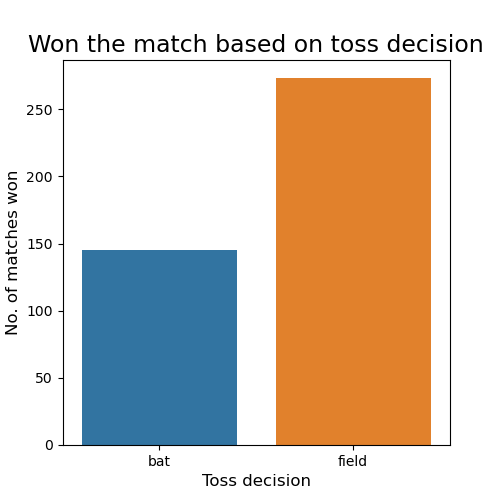

In [28]:
fig7, ax7 = plt.subplots(figsize = (5,5))
sns.countplot(x = match_data.loc[(match_data['toss_winner'] == match_data['winner']), 'toss_decision'])

ax7.set_xlabel('Toss decision', fontsize = 12)
ax7.set_ylabel('No. of matches won', fontsize = 12)
ax7.set_title('Won the match based on toss decision', fontsize = 17)



## Biggest win for chasing team

In [29]:
winbywicketfilter = (match_data['result'] == 'wickets')
match_data.loc[winbywicketfilter ].sort_values(by = 'result_margin', ascending = False).head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,bat_first,chasingteam
317,548377,Jaipur,20-05-2012,DR Smith,Sawai Mansingh Stadium,0,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,Mumbai Indians,wickets,10.0,N,NaN,HDPK Dharmasena,C Shamshuddin,2012,Rajasthan Royals,Mumbai Indians


## Biggest win for team batting first

In [30]:
winbyrunsfilter =(match_data['result'] == 'runs')
match_data.loc[winbyrunsfilter ].sort_values(by = 'result_margin', ascending = False).head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,bat_first,chasingteam
620,1082635,Delhi,06-05-2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017,Mumbai Indians,Delhi Daredevils


## Players who have scored the maximum runs score in ipl so far.

          batsman  Total runs in IPL
0         V Kohli               5878
1        SK Raina               5368
2       DA Warner               5254
3       RG Sharma               5230
4        S Dhawan               5197
5  AB de Villiers               4849
6        CH Gayle               4772
7        MS Dhoni               4632
8      RV Uthappa               4607
9       G Gambhir               4217


Text(0.5, 1.0, 'Top run scorers of IPL so far')

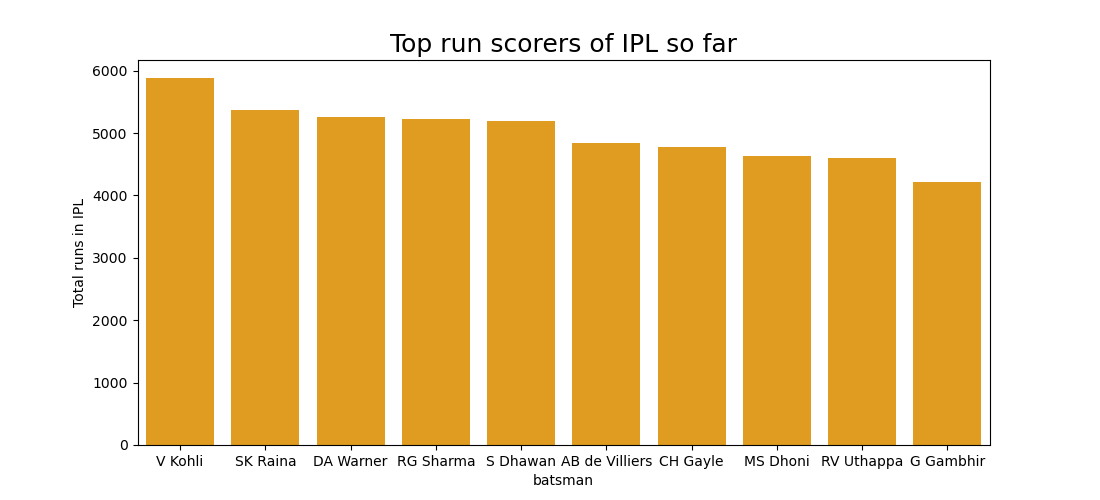

In [31]:
top_scorers_of_all_time = ball_data.groupby('batsman')['batsman_runs'].sum().reset_index().rename(columns = {'batsman_runs' : 'Total runs in IPL'}).sort_values(by = 'Total runs in IPL', ascending = False).reset_index().head(10)
top_scorers_of_all_time.drop('index', axis = 1, inplace = True)
print(top_scorers_of_all_time)
fig8,ax8 = plt.subplots(figsize = (11,5))
sns.barplot(x = 'batsman', y ='Total runs in IPL', data = top_scorers_of_all_time, color = 'orange')
ax8.set_title('Top run scorers of IPL so far', fontsize = 18)

## Players who have  won the man of the match max no of times:

In [32]:
motm_winners = match_data['player_of_match'].value_counts().reset_index()
motm_winners.rename(columns = {'index': 'Player', 'player_of_match': 'No. of times'}).head(10)

,Player,No. of times
0,AB de Villiers,23
1,CH Gayle,22
2,RG Sharma,18
3,MS Dhoni,17
4,DA Warner,17
5,SR Watson,16
6,YK Pathan,16
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,13


## Which stadium is best for a particular team if you win the toss?

In [33]:
print("List of all teams are:\n\n", match_data['team1'].unique())

List of all teams are:

 ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


#### Enter team name, when prompted, by copy-pasting the data from the above list of teams.

In [34]:
teamname = input('Enter team name')
filterr2 = (match_data['winner'] == teamname)
print('The best stadium for ', teamname, 'is ', match_data.loc[filterr2, 'venue'].mode().iloc[0])

Enter team name Mumbai Indians


The best stadium for  Mumbai Indians is  Wankhede Stadium


## Let's analyse any arbitrary player:

In [35]:
print('List of all batsmen in the data set:\n\n',ball_data['batsman'].unique())

List of all batsmen in the data set:

 ['RT Ponting' 'BB McCullum' 'DJ Hussey' 'Mohammad Hafeez' 'SC Ganguly'
 'CL White' 'MV Boucher' 'B Akhil' 'AA Noffke' 'P Kumar' 'Z Khan'
 'SB Joshi' 'W Jaffer' 'JH Kallis' 'R Dravid' 'V Kohli' 'K Goel'
 'MEK Hussey' 'JR Hopes' 'SK Raina' 'JDP Oram' 'S Badrinath' 'PA Patel'
 'ML Hayden' 'MS Dhoni' 'KC Sangakkara' 'Yuvraj Singh' 'SM Katich'
 'IK Pathan' 'T Kohli' 'YK Pathan' 'S Dhawan' 'G Gambhir' 'SK Warne'
 'D Salunkhe' 'SK Trivedi' 'V Sehwag' 'SR Watson' 'M Kaif' 'DS Lehmann'
 'RA Jadeja' 'M Rawat' 'L Ronchi' 'ST Jayasuriya' 'DJ Thornely'
 'RV Uthappa' 'PR Shah' 'AM Nayar' 'SM Pollock' 'Harbhajan Singh'
 'S Chanderpaul' 'LRPL Taylor' 'WP Saha' 'AS Yadav' 'A Symonds'
 'SB Bangar' 'WPUJC Vaas' 'RP Singh' 'AC Gilchrist' 'Y Venugopal Rao'
 'VVS Laxman' 'RG Sharma' 'SB Styris' 'LR Shukla' 'PP Chawla'
 'Kamran Akmal' 'DPMD Jayawardene' 'S Sohal' 'B Lee' 'WA Mota'
 'Shahid Afridi' 'DJ Bravo' 'A Nehra' 'MA Khote' 'GC Smith' 'Pankaj Singh'
 'S Sreesanth' 

Enter name of Player: (Copy-paste from above list) Yuvraj Singh


caught               84
bowled               10
lbw                   5
run out               4
stumped               3
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64


Text(0.5, 1.0, 'Yuvraj Singh dismissals in IPL')

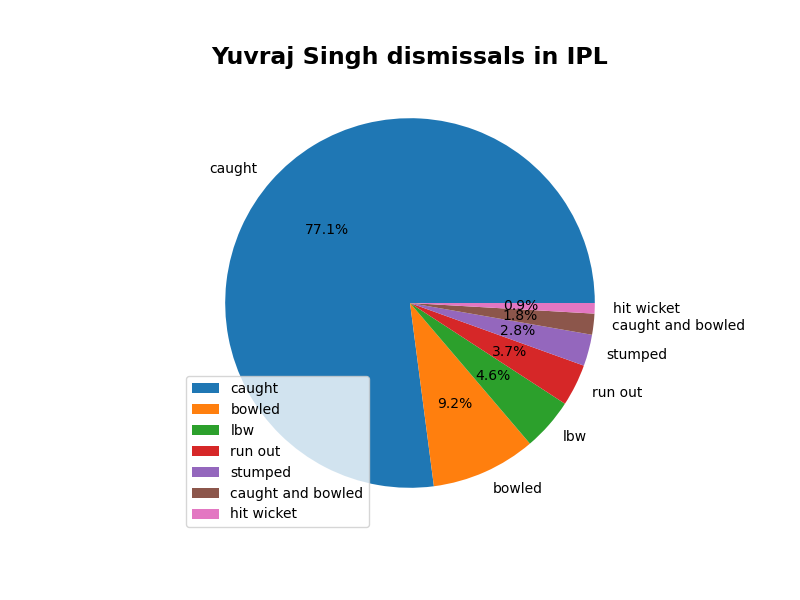

In [36]:
player = input('Enter name of Player: (Copy-paste from above list)')

playerinfo = ball_data.loc[ball_data['batsman'] == player]
player_dismissal = playerinfo['dismissal_kind'].value_counts()

print(player_dismissal)
fig9,ax9 = plt.subplots(figsize = (8,6))
player_dismissal.plot(y = 'dismissal_kind', kind = 'pie', autopct='%1.1f%%',  ax = ax9, legend = True)
ax9.set_ylabel(None)
ax9.legend(loc = 'lower left')
ax9.set_title( f'{player} dismissals in IPL', fontsize = 17, fontweight = 'bold')

## Singles, doubles and boundaries scored by the <code>player<code>

The number of 1's scored by Yuvraj Singh = 741
The number of 2's scored by Yuvraj Singh = 119
The number of 3's scored by Yuvraj Singh = 3
The number of 4's scored by Yuvraj Singh = 217
The number of 5's scored by Yuvraj Singh = 0
The number of 6's scored by Yuvraj Singh = 149


Text(0.5, 1.0, "Yuvraj Singh's scoring modes in IPL")

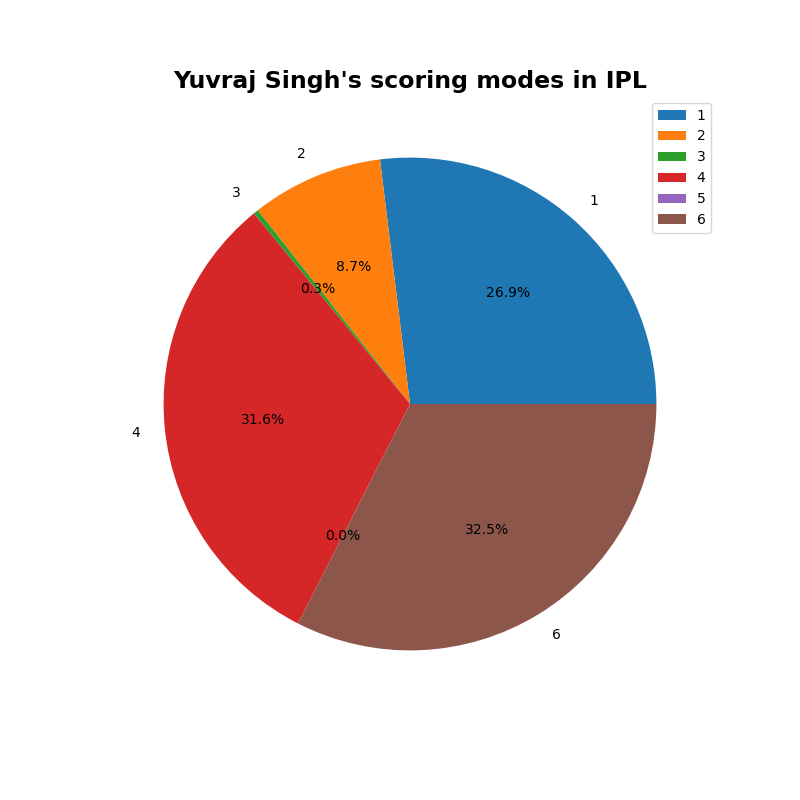

In [37]:
wagonwhee = {}
for i in [1,2,3,4,5,6]:
    filter_playerscoring = (playerinfo['batsman_runs'] == i)
    print(f"The number of {i}'s scored by {player} = {int(playerinfo.loc[filter_playerscoring, 'batsman_runs'].sum()/i)}")
    
    wagonwhee[i] =     int(playerinfo.loc[filter_playerscoring, 'batsman_runs'].sum())
    
    
wagon_player = pd.DataFrame.from_dict(wagonwhee, orient = 'index', columns = ['Total_runs'])

fig10,ax10 = plt.subplots()
wagon_player.plot(y = 'Total_runs', kind = 'pie', autopct='%1.1f%%',  ax = ax10, legend = True, figsize = (8,8))
ax10.set_ylabel(None)
# ax9.legend(loc = 'lower left')
ax10.set_title( f"{player}'s scoring modes in IPL", fontsize = 17, fontweight = 'bold')